 # Notebook Content :
1. [Part 1:  Importing Necessary Libraries and datasets](#1)
1. [Part 2:  Understanding the data](#2)
1. [Part 3 : Exploratory Data Analysis](#3)
1. [Part4 : Data Visualisation](#4)
1. [Conclusion](#5)

<a id='1'></a>
### 1. Part 1:  Importing Necessary Libraries and datasets

In [54]:
# Import Libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

import warnings
warnings.simplefilter(action="ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-happiness-report-2023/WHR2023.csv
/kaggle/input/country-mapping-iso-continent-region/continents2.csv


In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [57]:
# Read data 
df = pd.read_csv("/kaggle/input/world-happiness-report-2023/WHR2023.csv")
mapping_country = pd.read_csv("/kaggle/input/country-mapping-iso-continent-region/continents2.csv")

<a id='2'></a>

### Part 2:  Understanding the data

In [58]:
df.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

In [60]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,137.000,137.000,137.000,137.000,137.000,137.000,136.000,137.000,137.000,137.000,137.000,137.000,137.000,136.000,137.000,137.000,137.000,136.000
mean,5.540,0.065,5.667,5.413,9.450,0.799,64.968,0.787,0.022,0.725,1.778,1.407,1.156,0.366,0.540,0.148,0.146,1.778
std,1.140,0.023,1.117,1.164,1.207,0.129,5.750,0.112,0.142,0.177,0.000,0.433,0.326,0.157,0.150,0.076,0.127,0.504
min,1.859,0.029,1.923,1.795,5.527,0.341,51.530,0.382,-0.254,0.146,1.778,0.000,0.000,0.000,0.000,0.000,0.000,-0.110
25%,4.724,0.047,4.980,4.496,8.591,0.722,60.648,0.724,-0.074,0.668,1.778,1.099,0.962,0.248,0.455,0.097,0.060,1.555
50%,5.684,0.060,5.797,5.529,9.567,0.827,65.838,0.801,0.001,0.774,1.778,1.449,1.227,0.390,0.557,0.137,0.111,1.849
75%,6.334,0.077,6.441,6.243,10.540,0.896,69.412,0.874,0.117,0.846,1.778,1.798,1.401,0.487,0.656,0.199,0.187,2.079
max,7.804,0.147,7.875,7.733,11.660,0.983,77.280,0.961,0.531,0.929,1.778,2.200,1.620,0.702,0.772,0.422,0.561,2.955


In [61]:
df.isnull().sum()

Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64

In [8]:
mapping_country.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.000,34.000,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.000,154.000,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.000,39.000,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.000,15.000,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.000,61.000,NaN


In [62]:
mapping_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      249 non-null    object 
 1   alpha-2                   248 non-null    object 
 2   alpha-3                   249 non-null    object 
 3   country-code              249 non-null    int64  
 4   iso_3166-2                249 non-null    object 
 5   region                    248 non-null    object 
 6   sub-region                248 non-null    object 
 7   intermediate-region       107 non-null    object 
 8   region-code               248 non-null    float64
 9   sub-region-code           248 non-null    float64
 10  intermediate-region-code  107 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 21.5+ KB


In [63]:
mapping_country.isnull().sum()

name                          0
alpha-2                       1
alpha-3                       0
country-code                  0
iso_3166-2                    0
region                        1
sub-region                    1
intermediate-region         142
region-code                   1
sub-region-code               1
intermediate-region-code    142
dtype: int64

####  Let's operationalize these initial analyses.

In [64]:
# Big Picture
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    



In [65]:
check_df(df)

##################### Shape #####################
(137, 19)
##################### Types #####################
Country name                                   object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity  

In [66]:
check_df(mapping_country)

##################### Shape #####################
(249, 11)
##################### Types #####################
name                         object
alpha-2                      object
alpha-3                      object
country-code                  int64
iso_3166-2                   object
region                       object
sub-region                   object
intermediate-region          object
region-code                 float64
sub-region-code             float64
intermediate-region-code    float64
dtype: object
##################### Head #####################
             name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     Afghanistan      AF     AFG             4  ISO 3166-2:AF     Asia   
1   Åland Islands      AX     ALA           248  ISO 3166-2:AX   Europe   
2         Albania      AL     ALB             8  ISO 3166-2:AL   Europe   
3         Algeria      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4  American Samoa      AS     ASM            16  ISO 316

In [67]:
# unique countries
df['Country name'].unique()

array(['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands', 'Sweden',
       'Norway', 'Switzerland', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Canada', 'Ireland', 'United States', 'Germany',
       'Belgium', 'Czechia', 'United Kingdom', 'Lithuania', 'France',
       'Slovenia', 'Costa Rica', 'Romania', 'Singapore',
       'United Arab Emirates', 'Taiwan Province of China', 'Uruguay',
       'Slovakia', 'Saudi Arabia', 'Estonia', 'Spain', 'Italy', 'Kosovo',
       'Chile', 'Mexico', 'Malta', 'Panama', 'Poland', 'Nicaragua',
       'Latvia', 'Bahrain', 'Guatemala', 'Kazakhstan', 'Serbia', 'Cyprus',
       'Japan', 'Croatia', 'Brazil', 'El Salvador', 'Hungary',
       'Argentina', 'Honduras', 'Uzbekistan', 'Malaysia', 'Portugal',
       'South Korea', 'Greece', 'Mauritius', 'Thailand', 'Mongolia',
       'Kyrgyzstan', 'Moldova', 'China', 'Vietnam', 'Paraguay',
       'Montenegro', 'Jamaica', 'Bolivia', 'Russia',
       'Bosnia and Herzegovina', 'Colombia', 'Domin

<a id='3'></a>

### Part 3 : Exploratory Data Analysis

It gives the names of categorical, numerical and categorical but cardinal variables in the data set.

In [68]:
# Variable

def grab_col_names(dataframe, cat_th= 10 , car_th = 20 ):
    """
     It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
     Note: Categorical variables with numerical appearance are also included in categorical variables.

     parameters
     ------
         dataframe: dataframe
                 The dataframe from which variable names are to be retrieved
         cat_th: int, optional
                 class threshold for numeric but categorical variables
         car_th: int, optional
                 class threshold for categorical but cardinal variables

     returns
     ------
         cat_cols: list
                 Categorical variable list
         num_cols: list
                 Numeric variable list
         cat_but_car: list
                 Categorical view cardinal variable list

     examples
     ------
         import seaborn as sns
         df = sns.load_dataset("iris")
         print(grab_col_names(df))


     Notes
     ------
         cat_cols + num_cols + cat_but_car = total number of variables
         num_but_cat is inside cat_cols.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 137
Variables: 19
cat_cols: 1
num_cols: 17
cat_but_car: 1
num_but_cat: 1


In [69]:
# Remove all columns between column name 'Ladder score in Dystopia' to 'Dystopia + residual' 
df = df.drop(df.loc[:, 'Ladder score in Dystopia':'Dystopia + residual'].columns, axis=1)
# Remove all columns between column name 'Standard error of ladder score' to 'lowerwhisker' 
df = df.drop(df.loc[:, 'Standard error of ladder score':'lowerwhisker'].columns, axis=1)

In [70]:
#Create integer rank column 
df['rank'] = df['Ladder score'].rank(ascending=False)
df['rank'] = df['rank'].astype(int)

In [71]:
#Rename the columns for consistency
df = df.rename({'Country name':'country','Standard error of ladder score':'standard_error_of_ladder_score'
                                   , 'Ladder score':'happiness_score','Happiness score':'happiness_score'
                                   , 'Logged GDP per capita':'gdp_per_capita','Social support':'social_support'
                                   , 'Healthy life expectancy':'healthy_life_expectancy'
                                   , 'Freedom to make life choices':'freedom_to_make_life_choices'
                                   , 'Generosity':'generosity','Perceptions of corruption':'perceptions_of_corruption'
                                   , 'Explained by: Freedom to make life choices':'freedom_to_make_life_choices'
                                   , 'Explained by: Generosity':'generosity'
                                   , 'Explained by: Perceptions of corruption':'perceptions_of_corruption'}, axis =1)
df.head()

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5


In [72]:
#Create top 10 and bottom 10 identifier column

def top_bottom_identifier(value):
    if value < 11:
        return "top 10 happiest"
    if value > 127:
        return "bottom 10 happiest"
    elif 11 <= value < 128:
        return "not top/bottom 10"
    
df['top_bottom_identifier'] = df['rank'].map(top_bottom_identifier)

In [73]:
df.head()

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,top_bottom_identifier
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1,top 10 happiest
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2,top 10 happiest
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3,top 10 happiest
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4,top 10 happiest
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5,top 10 happiest


In [74]:
mapping_country.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.000,34.000,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.000,154.000,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.000,39.000,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.000,15.000,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.000,61.000,NaN


In [75]:
# Dropping irrelevant columns
mapping_country.drop('alpha-2', inplace=True, axis=1)
# Remove all columns between column name 'country-code' to 'iso_3166-2' 
mapping_country = mapping_country.drop(mapping_country.loc[:, 'country-code':'iso_3166-2'].columns, axis=1)
# Remove all columns between column name 'intermediate-region' to 'intermediate-region-code' 
mapping_country = mapping_country.drop(mapping_country.loc[:, 'intermediate-region':'intermediate-region-code'].columns, axis=1)
mapping_country.head()

,name,alpha-3,region,sub-region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


In [76]:
#Rename the columns for consistency
mapping_country = mapping_country.rename({'name':'country','alpha-3':'iso_alpha','sub-region':'sub_region'}, axis =1)
mapping_country.head()

,country,iso_alpha,region,sub_region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


In [77]:
df_region = df.merge(mapping_country, on='country', how='left')

df_region

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,top_bottom_identifier,iso_alpha,region,sub_region
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1,top 10 happiest,FIN,Europe,Northern Europe
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2,top 10 happiest,DNK,Europe,Northern Europe
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3,top 10 happiest,ISL,Europe,Northern Europe
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4,top 10 happiest,ISR,Asia,Western Asia
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5,top 10 happiest,NLD,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,133,bottom 10 happiest,NaN,NaN,NaN
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,134,bottom 10 happiest,ZWE,Africa,Sub-Saharan Africa
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,135,bottom 10 happiest,SLE,Africa,Sub-Saharan Africa
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,136,bottom 10 happiest,LBN,Asia,Western Asia


In [78]:
df_region.isnull().sum()

country                          0
happiness_score                  0
gdp_per_capita                   0
social_support                   0
healthy_life_expectancy          1
freedom_to_make_life_choices     0
generosity                       0
perceptions_of_corruption        0
rank                             0
top_bottom_identifier            0
iso_alpha                       11
region                          11
sub_region                      11
dtype: int64

In [79]:
check_df(df_region)

##################### Shape #####################
(137, 13)
##################### Types #####################
country                          object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
rank                              int64
top_bottom_identifier            object
iso_alpha                        object
region                           object
sub_region                       object
dtype: object
##################### Head #####################
       country  happiness_score  gdp_per_capita  social_support  \
0      Finland            7.804          10.792           0.969   
1      Denmark            7.586          10.962           0.954   
2      Iceland            7.530          10.896           0.983   
3       Israel            7.473        

In [80]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df_region, na_name=True)

                         n_miss  ratio
iso_alpha                    11  8.030
region                       11  8.030
sub_region                   11  8.030
healthy_life_expectancy       1  0.730


In [81]:
df_region = df_region.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)

In [82]:
df_region.isnull().sum()

country                          0
happiness_score                  0
gdp_per_capita                   0
social_support                   0
healthy_life_expectancy          0
freedom_to_make_life_choices     0
generosity                       0
perceptions_of_corruption        0
rank                             0
top_bottom_identifier            0
iso_alpha                       11
region                          11
sub_region                      11
dtype: int64

In [83]:
nan_region_rows = df_region[df_region['region'].isnull()]

nan_region_rows

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,top_bottom_identifier,iso_alpha,region,sub_region
17,Czechia,6.845,10.611,0.953,69.050,0.903,0.040,0.859,18,not top/bottom 10,NaN,NaN,NaN
26,Taiwan Province of China,6.535,10.797,0.884,69.600,0.804,-0.129,0.681,27,not top/bottom 10,NaN,NaN,NaN
33,Kosovo,6.368,9.359,0.844,65.195,0.861,0.259,0.866,34,not top/bottom 10,NaN,NaN,NaN
70,Bosnia and Herzegovina,5.633,9.616,0.880,67.275,0.746,0.206,0.918,71,not top/bottom 10,NaN,NaN,NaN
81,Hong Kong S.A.R. of China,5.308,10.966,0.817,77.280,0.687,-0.026,0.385,82,not top/bottom 10,NaN,NaN,NaN
85,Congo (Brazzaville),5.267,8.095,0.605,56.850,0.730,-0.004,0.739,86,not top/bottom 10,NaN,NaN,NaN
86,North Macedonia,5.254,9.703,0.805,66.500,0.769,0.131,0.902,87,not top/bottom 10,NaN,NaN,NaN
92,Ivory Coast,5.053,8.576,0.572,55.953,0.733,0.003,0.746,93,not top/bottom 10,NaN,NaN,NaN
98,State of Palestine,4.908,8.716,0.859,64.968,0.694,-0.132,0.836,99,not top/bottom 10,NaN,NaN,NaN
105,Turkiye,4.614,10.307,0.796,68.663,0.475,-0.077,0.795,106,not top/bottom 10,NaN,NaN,NaN


In [86]:
#Manually updating region, sub_region and iso code for Czechia
df_region.loc[17,'region'] = 'Europe'
df_region.loc[17,'sub_region'] = 'Eastern Europe'
df_region.loc[17,'iso_alpha'] = 'CZE'

#Manually updating region, sub_region and iso code for Taiwan Province of China 
df_region.loc[26,'region'] = 'Asia'
df_region.loc[26,'sub_region'] = 'Eastern Asia'
df_region.loc[26,'iso_alpha'] = 'TWN'

#Manually updating region, sub_region and iso code for Kosovo
df_region.loc[33,'region'] = 'Europe'
df_region.loc[33,'sub_region'] = 'Southern Europe'
df_region.loc[33,'iso_alpha'] = 'XXK'

#Manually updating region, sub_region and iso code for Bosnia and Herzegovina
df_region.loc[70,'region'] = 'Europe'
df_region.loc[70,'sub_region'] = 'Southern Europe'
df_region.loc[70,'iso_alpha'] = 'BIH'

#Manually updating region, sub_region and iso code for Hong Kong S.A.R. of China
df_region.loc[81,'region'] = 'Asia'
df_region.loc[81,'sub_region'] = 'East Asia'
df_region.loc[81,'iso_alpha'] = 'HKG'

#Manually updating region, sub_region and iso code for Congo (Brazzaville)
df_region.loc[85,'region'] = 'Africa'
df_region.loc[85,'sub_region'] = 'Sub-Saharan Africa'
df_region.loc[85,'iso_alpha'] = 'COG'

#Manually updating region, sub_region and iso code for North Macedonia 
df_region.loc[86,'region'] = 'Europe'
df_region.loc[86,'sub_region'] = 'Southern Europe'
df_region.loc[86,'iso_alpha'] = 'MKD'

#Manually updating region, sub_region and iso code for Ivory Coast 
df_region.loc[92,'region'] = 'Africa'
df_region.loc[92,'sub_region'] = 'Sub-Saharan Africa'
df_region.loc[92,'iso_alpha'] = 'CIV'

#Manually updating region, sub_region and iso code for State of Palestine
df_region.loc[98,'region'] = 'Asia'
df_region.loc[98,'sub_region'] = 'Western Asia'
df_region.loc[98,'iso_alpha'] = 'PSE'

#Manually updating region, sub_region and iso code for Türkiye 
df_region.loc[105,'region'] = 'Asia'
df_region.loc[105,'sub_region'] = 'Western Asia'
df_region.loc[105,'iso_alpha'] = 'TUR'

#Manually updating region, sub_region and iso code for Congo (Kinshasa)
df_region.loc[132,'region'] = 'Africa'
df_region.loc[132,'sub_region'] = 'Sub-Saharan Africa'
df_region.loc[132,'iso_alpha'] = 'COD'



In [87]:
df_region.query('country == "Turkiye" ' )

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,top_bottom_identifier,iso_alpha,region,sub_region
105,Turkiye,4.614,10.307,0.796,68.663,0.475,-0.077,0.795,106,not top/bottom 10,TUR,Asia,Western Asia


In [88]:
df_region.isnull().sum() 

country                         0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
rank                            0
top_bottom_identifier           0
iso_alpha                       0
region                          0
sub_region                      0
dtype: int64

In [89]:
df_region 

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,top_bottom_identifier,iso_alpha,region,sub_region
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1,top 10 happiest,FIN,Europe,Northern Europe
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2,top 10 happiest,DNK,Europe,Northern Europe
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3,top 10 happiest,ISL,Europe,Northern Europe
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4,top 10 happiest,ISR,Asia,Western Asia
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5,top 10 happiest,NLD,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,133,bottom 10 happiest,COD,Africa,Sub-Saharan Africa
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,134,bottom 10 happiest,ZWE,Africa,Sub-Saharan Africa
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,135,bottom 10 happiest,SLE,Africa,Sub-Saharan Africa
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,136,bottom 10 happiest,LBN,Asia,Western Asia


#### Outlier ANALYSIS

In [90]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit



In [91]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_region)

for col in num_cols:
    print(col, check_outlier(df_region, col))

for col in num_cols:
    replace_with_thresholds(df_region, col)

for col in num_cols:
    print(col, check_outlier(df_region, col))

Observations: 137
Variables: 13
cat_cols: 3
num_cols: 8
cat_but_car: 2
num_but_cat: 0
happiness_score False
gdp_per_capita False
social_support False
healthy_life_expectancy False
freedom_to_make_life_choices False
generosity False
perceptions_of_corruption False
rank False
happiness_score False
gdp_per_capita False
social_support False
healthy_life_expectancy False
freedom_to_make_life_choices False
generosity False
perceptions_of_corruption False
rank False


In [92]:
df_region.columns

Index(['country', 'happiness_score', 'gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'rank', 'top_bottom_identifier',
       'iso_alpha', 'region', 'sub_region'],
      dtype='object')

<a id='4'></a>

### Part 4 : Data Visualisation 

* Top and bottom happiest countries
* Happiest score density and distribution
* Factor densities
* Happiness score boxplots by region and sub_regions
* Sunburst plot (Region - Sub_regions - country) mean happiness scores
* Worldmap global visualisation

#### Happiest and Unhappiest Countries

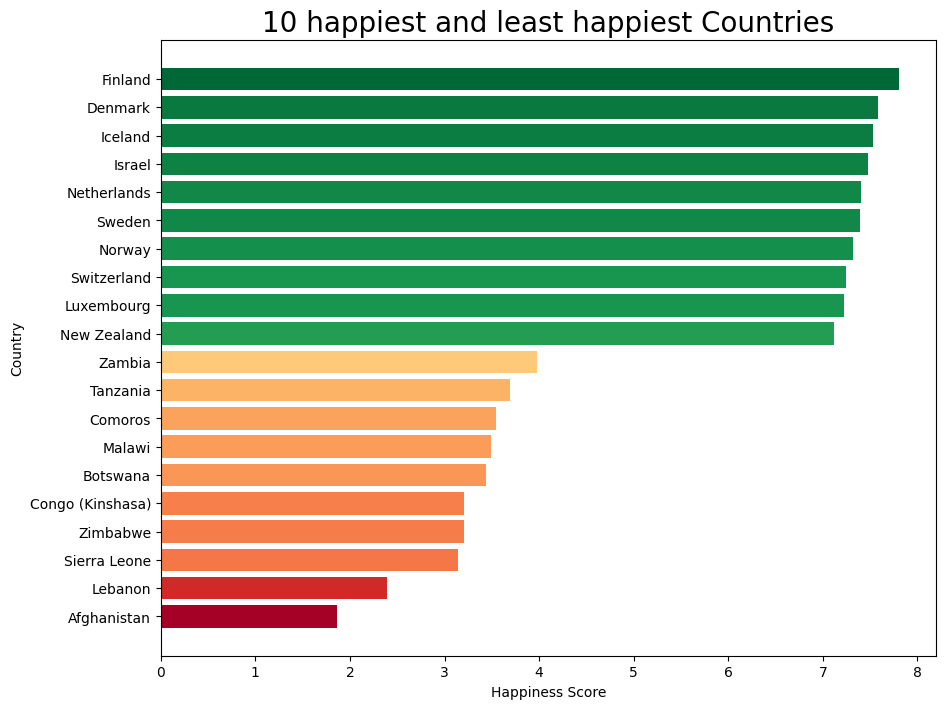

In [93]:
top10 = df_region.set_index('country')['happiness_score'].nlargest(10).to_frame()
bottom10 = df_region.set_index('country')['happiness_score'].nsmallest(10).to_frame()
dfconcat = pd.concat([top10, bottom10], axis=0)
dfconcat = dfconcat.sort_values(by="happiness_score")

fig = plt.figure(figsize=(10,8))
cmap = plt.cm.RdYlGn
norm = plt.Normalize(vmin=dfconcat['happiness_score'].min(), vmax=dfconcat['happiness_score'].max())
colors = [cmap(norm(value)) for value in dfconcat['happiness_score']]

g = plt.barh(y=dfconcat.index, width=dfconcat["happiness_score"], color= colors)
plt.ylabel("Country")
plt.xlabel("Happiness Score")
plt.title("10 happiest and least happiest Countries", fontsize = 20)

plt.show()

I can observe the mean (red line) and median (black line) values are similar, indicating the happiness score has quite a symmetrical distribution with a slight left skew

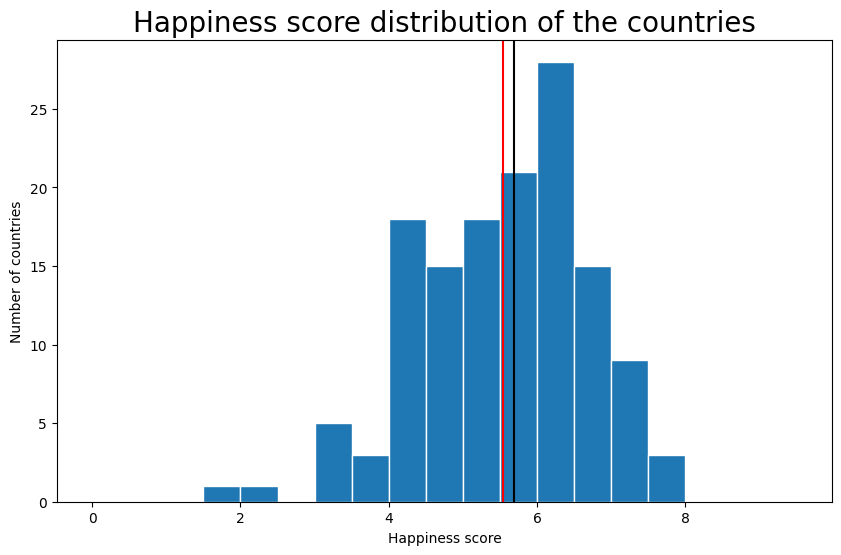

In [43]:
plt.figure(figsize=(10,6))
plt.title("Happiness score distribution of the countries", fontsize = 20)
plt.xlabel('Happiness score')
plt.ylabel('Number of countries')
plt.hist(df_region.happiness_score, bins = np.arange(0,10,0.5), edgecolor = 'white')

plt.axvline(x = df_region['happiness_score'].mean(), color = 'red')
plt.axvline(x = df_region['happiness_score'].median(), color = 'black')

In [94]:
mean_happiness = df_region.groupby('region')[['happiness_score']].mean()
mean_happiness = mean_happiness.sort_values(by=['happiness_score'], ascending=False)

mean_happiness

,happiness_score
region,
Oceania,7.109
Europe,6.476
Americas,6.058
Asia,5.301
Africa,4.419


[Text(0.5, 0, 'Happiness Score'), Text(0, 0.5, 'Region')]

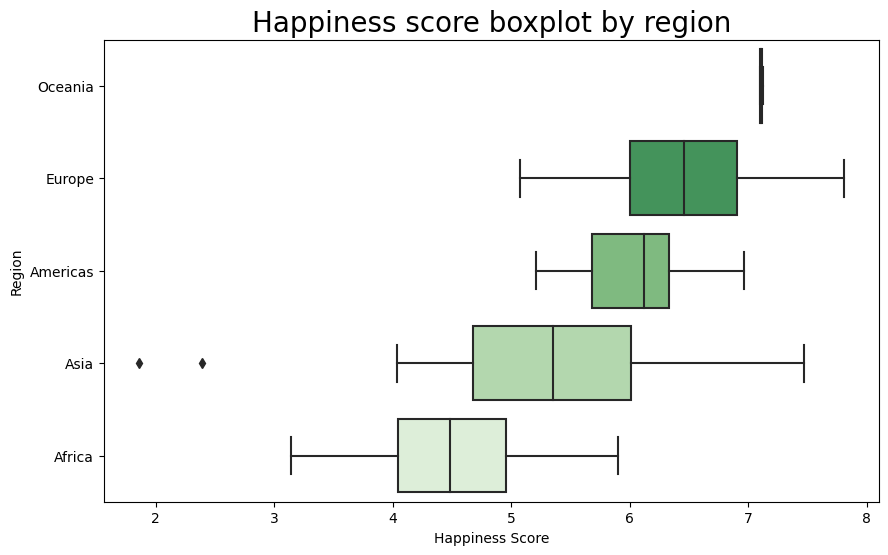

In [95]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Happiness score boxplot by region", fontsize = 20)
sns.boxplot(y="region", x="happiness_score", data = df_region, orient="h", ax=ax, palette='Greens_r', order=["Oceania", "Europe", "Americas", "Asia", "Africa"] ).set(
    xlabel='Happiness Score', 
    ylabel='Region'
)

In [96]:
mean_happiness = df_region.groupby('sub_region')[['happiness_score']].mean()
mean_happiness = mean_happiness.sort_values(by=['happiness_score'], ascending=False)
mean_happiness

,happiness_score
sub_region,
Australia and New Zealand,7.109
Northern Europe,7.077
Western Europe,7.054
Northern America,6.928
Eastern Asia,6.055
Eastern Europe,6.025
Southern Europe,6.016
Latin America and the Caribbean,5.966
Central Asia,5.828


In [97]:
fig = px.sunburst(data_frame= df_region,
                  path=["region", "sub_region", "country"],
                  values="happiness_score",
                  color="happiness_score",
                  color_continuous_scale='RdYlGn',
                  width=1000, 
                  height=1000,
                  title = 'Happiness score sunburst - region / sub region / country')
fig.show()

In [98]:
#Visualise happiness score rankings on a global scale

happy_world_map = px.choropleth(df_region, locations = "iso_alpha", 
              color = "rank", scope = 'world', title = "Happiness Ranking World Map", 
              color_continuous_scale= "rdylgn_r", hover_name="country")

happy_world_map.show()

In [99]:
#Visualise happiness score rankings on a global scale

happy_world_map = px.choropleth(df_region, locations = "iso_alpha", 
              color = "rank", scope = 'africa', title = "Happiness Ranking World Map", 
              color_continuous_scale= "rdylgn_r", hover_name="country")

happy_world_map.show()

<Figure size 500x1000 with 0 Axes>

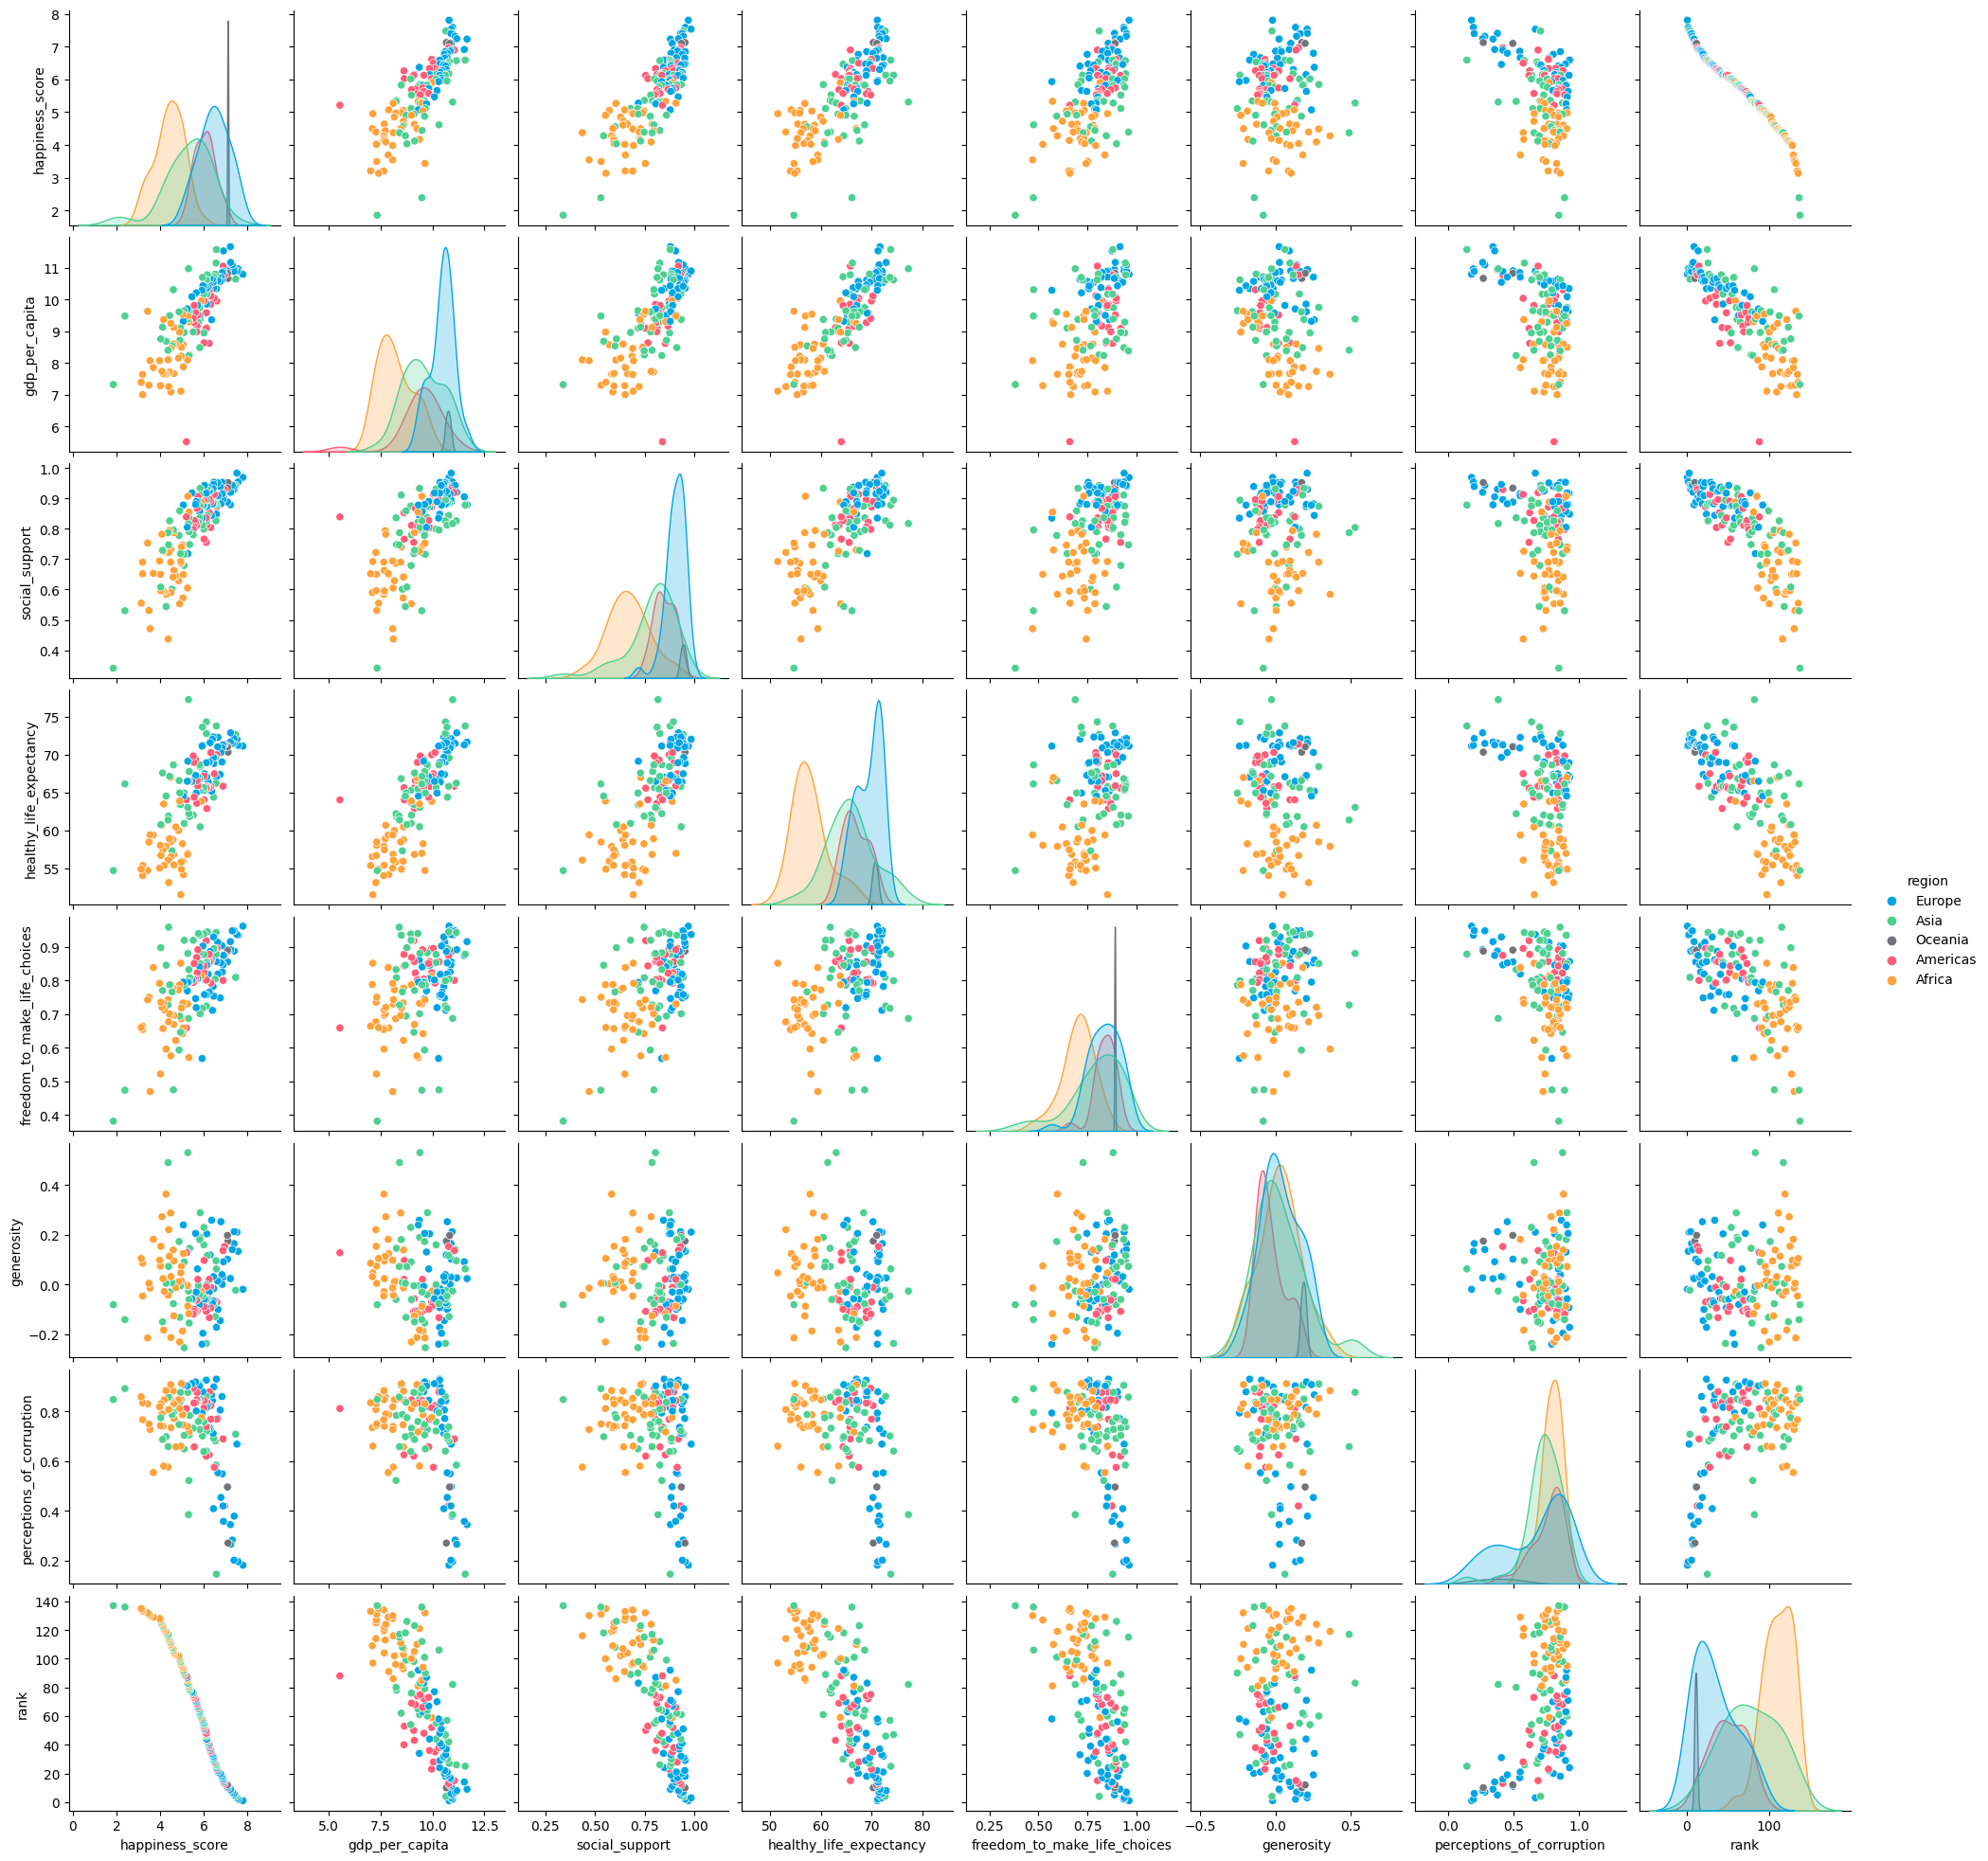

In [100]:
palette ={"Europe": "#00A5E3", "Asia": "#4DD091", "Oceania": "#74737A", "Americas": "#FF5C77", "Africa": "#FFA23A"}
plt.figure(figsize = (5,10))
sns.pairplot(df_region, hue = 'region', palette = palette)

<a id='5'></a>

###  Conclusion 

We analysed given data. Now we can conclude our analysis. we find out that Fineland, Norway, Denmark and switzerland are most happiest countries.Their Economy is very good. Economy (GDP per Capita), Family, Health, Freedom and Government Corruption effect happiness score and happiness rank. 